Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Ronald Garcia"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Let's create a dataframe using the train.csv file
df_origin=pd.read_csv('train.csv',index_col=None)

In [4]:
df_origin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#SibSp: Number of siblings/spouses aboard
#Parch: Number of parents/children aboard
df_origin.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
#Let's check if there's any missing data
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#There are some missing values in the Age, Cabin and Embarked columns. We will deal with them later.
df_origin.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Let's try to find out the expect survival for some features - Basic analysis
df_origin[['Pclass', 'Sex','SibSp','Parch']].nunique()

Pclass    3
Sex       2
SibSp     7
Parch     7
dtype: int64

In [9]:
#Pclass or Passenger Class
df_origin[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
#Sex
df_origin[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
#Percentaje for number of siblings and number of parents/children
df_origin[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
df_origin[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
#Dealing with missing values
#We are going to ignore the Cabin column since more than 70% of that column is missing
#We are also going to ignore the Ticket column since it doesn't seem to add any value
df2 = df_origin.drop(['Cabin', 'Ticket'], axis=1)

In [14]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
#Going back to some feature analysis, let's create a family size column. Do families swim together?
df2['Family_Size'] = df2['SibSp'] + df2['Parch'] + 1

In [16]:
df2[['Family_Size','Survived']].groupby(['Family_Size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [17]:
#Interesting - We can see that the survival rate is low for single individuals and large families (more than 4)
#Let's create some bins so it's more evident
bins = [1,2,5,12]
bin_labels = ['Individual (1)','Small (2-4)','Large (>5)']
df2['Family_Size_Group'] = pd.cut(df2.Family_Size, bins, right=False, labels = bin_labels)

In [18]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Family_Size_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Small (2-4)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Small (2-4)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Individual (1)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Small (2-4)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Individual (1)


In [19]:
df2[['Family_Size_Group','Survived']].groupby(['Family_Size_Group'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_Size_Group,Survived
1,Small (2-4),0.578767
0,Individual (1),0.303538
2,Large (>5),0.161290


In [20]:
#Let's extract the title from the name so we can use it later
df2['Title'] = df2.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [21]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Family_Size_Group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Small (2-4),Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Small (2-4),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Individual (1),Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Small (2-4),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Individual (1),Mr


In [22]:
#Missing Age values - Let's do some exploration before populate the missing ages 
age_exploration = df2.groupby(['Sex','Pclass','Title'])['Age'].agg(['count', 'mean','median']).reset_index()
age_exploration

,Sex,Pclass,Title,count,mean,median
0,female,1,Dr,1,49.000000,49.0
1,female,1,Lady,1,48.000000,48.0
2,female,1,Miss,45,30.000000,30.0
3,female,1,Mlle,2,24.000000,24.0
4,female,1,Mme,1,24.000000,24.0
5,female,1,Mrs,34,40.882353,41.5
6,female,1,the Countess,1,33.000000,33.0
7,female,2,Miss,32,22.390625,24.0
8,female,2,Mrs,41,33.682927,32.0
9,female,2,Ms,1,28.000000,28.0


In [23]:
#What can we conclude from the age exploration? It seems like there is relationship between Age, Class and Title
#Let's use the median age based on the Sex, Pclass, and Title to replace NaN values
df2.loc[df2.Age.isnull(),'Age'] = df2.groupby(['Sex','Pclass', 'Title']).Age.transform('median').round(0)

In [24]:
df2.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             2
Family_Size          0
Family_Size_Group    0
Title                0
dtype: int64

In [25]:
#Great! No more NaNs for Age. Let's create some bins so it would be easier to review later
bins = [0,10,20,30,40,50,60,90]
bin_labels = ['0-9','10-19','20-29', '30-39', '40-49', '50-59', '>60']
df2['Age_Group'] = pd.cut(df2.Age, bins, right=False, labels = bin_labels)

In [26]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Family_Size_Group,Title,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Small (2-4),Mr,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Small (2-4),Mrs,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Individual (1),Miss,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Small (2-4),Mrs,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Individual (1),Mr,30-39


In [27]:
#Let's pull some basic stats for all columns
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.148339,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.500271,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [28]:
#Let's do some analysis 
#Which gender had a better chance of survival? and Which social class had a better chance of survival?
Gender_Analysis = pd.crosstab(df2['Sex'],df2['Pclass'],df2['Survived'],aggfunc='mean')
Gender_Analysis

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [29]:
#Woow! The percentaje of survival for women in class 1 and 2 is above 90%. Let's do some visualization

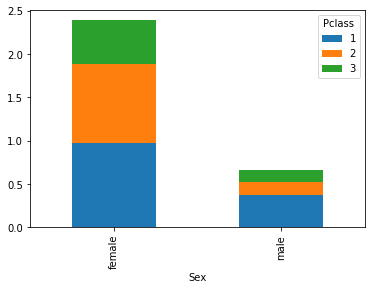

In [30]:
Gender_Analysis.plot(kind='bar',stacked=True)

In [31]:
#Now, what about survival rate based on the passenger age 
Age_Analysis = pd.crosstab(df2['Age_Group'],df2['Sex'],df2['Survived'],aggfunc=['mean','count'])
Age_Analysis

mean            count     
Sex          female      male female male
Age_Group                                
0-9        0.633333  0.583333     30   36
10-19      0.679487  0.122807     78   57
20-29      0.729730  0.134454     74  238
30-39      0.814286  0.215517     70  116
40-49      0.750000  0.217949     40   78
50-59      0.888889  0.133333     18   30
>60        1.000000  0.136364      4   22

In [33]:
#We can see that women between 30-39 and more than 50 had a high survival rate
#Let's consider another perspective for our age analysis including the passenger class
Age_Analysis_2 = pd.crosstab([df2['Sex'],df2['Age_Group']],df2['Pclass'],df2['Survived'],aggfunc=['mean','count'])
Age_Analysis_2

mean                     count             
Pclass                   1         2         3     1     2      3
Sex    Age_Group                                                 
female 0-9        0.000000  1.000000  0.523810   1.0   8.0   21.0
       10-19      1.000000  1.000000  0.561404  13.0   8.0   57.0
       20-29      0.937500  0.888889  0.483871  16.0  27.0   31.0
       30-39      1.000000  0.941176  0.520000  28.0  17.0   25.0
       40-49      1.000000  0.900000  0.000000  21.0  10.0    9.0
       50-59      0.916667  0.833333       NaN  12.0   6.0    NaN
       >60        1.000000       NaN  1.000000   3.0   NaN    1.0
male   0-9        1.000000  1.000000  0.400000   2.0   9.0   25.0
       10-19      0.400000  0.100000  0.095238   5.0  10.0   42.0
       20-29      0.500000  0.000000  0.119792  18.0  28.0  192.0
       30-39      0.521739  0.125000  0.150943  23.0  40.0   53.0
       40-49      0.311111  0.125000  0.080000  45.0   8.0   25.0
       50-59      0.266667  0.000000  0.000000  15.0   9.0    6.0
       >60        0.142857  0.250000  0.000000  14.0   4.0    4.0

In [34]:
#I wonder how the family size relates to this, back to the "Do families swim together?" question 
Family_Size_Analysis = pd.crosstab(df2['Sex'],df2['Family_Size_Group'],df2['Survived'],aggfunc=['mean','count'])
Family_Size_Analysis

mean                                 count  \
Family_Size_Group Individual (1) Small (2-4) Large (>5) Individual (1)   
Sex                                                                      
female                  0.785714    0.806452   0.272727            126   
male                    0.155718    0.321168   0.034483            411   

                                          
Family_Size_Group Small (2-4) Large (>5)  
Sex                                       
female                    155         33  
male                      137         29

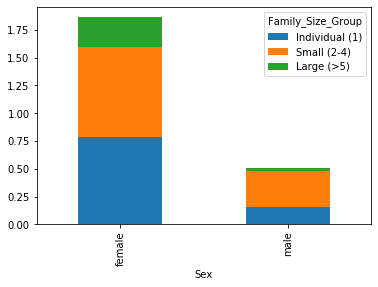

In [35]:
#We can see that our previous observation about low survival rate for single individuals applies mainly to men
#Another insight is that for both genders, the highest family-size survival rate is for small families 
#Let's do some visualization
Family_Size_Analysis = pd.crosstab(df2['Sex'],df2['Family_Size_Group'],df2['Survived'],aggfunc='mean')
Family_Size_Analysis.plot(kind='bar',stacked=True)

In [36]:
#Just because I am curious. Does your title matter? 
Title_Analysis = pd.crosstab(df2['Title'],df2['Sex'],df2['Survived'],aggfunc=['mean','count'])
Title_Analysis

mean            count       
Sex             female      male female   male
Title                                         
Capt               NaN  0.000000    NaN    1.0
Col                NaN  0.500000    NaN    2.0
Don                NaN  0.000000    NaN    1.0
Dr            1.000000  0.333333    1.0    6.0
Jonkheer           NaN  0.000000    NaN    1.0
Lady          1.000000       NaN    1.0    NaN
Major              NaN  0.500000    NaN    2.0
Master             NaN  0.575000    NaN   40.0
Miss          0.697802       NaN  182.0    NaN
Mlle          1.000000       NaN    2.0    NaN
Mme           1.000000       NaN    1.0    NaN
Mr                 NaN  0.156673    NaN  517.0
Mrs           0.792000       NaN  125.0    NaN
Ms            1.000000       NaN    1.0    NaN
Rev                NaN  0.000000    NaN    6.0
Sir                NaN  1.000000    NaN    1.0
the Countess  1.000000       NaN    1.0    NaN

In [37]:
#There are some interesting observations here, like Miss and Mrs for women. 
#Regarding men, the survival rate for Master is interesting. Master was 
#a way of addressing politely a boy ... too young to be called 'Mister'

# I have covered all the assignment questions (1 to 4) with the previous data analysis